No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


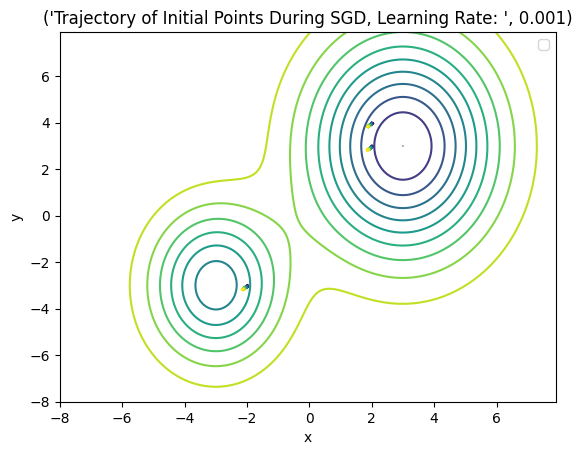

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


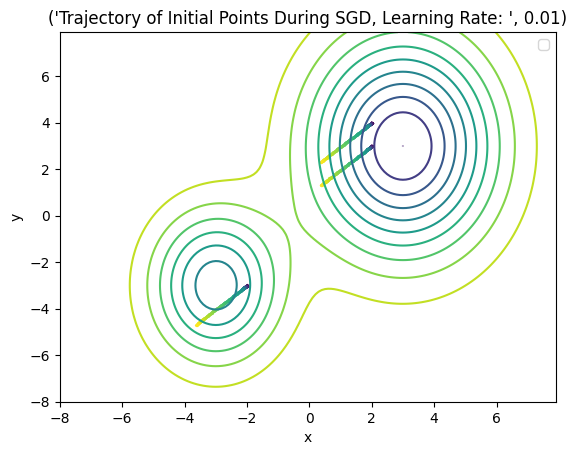

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


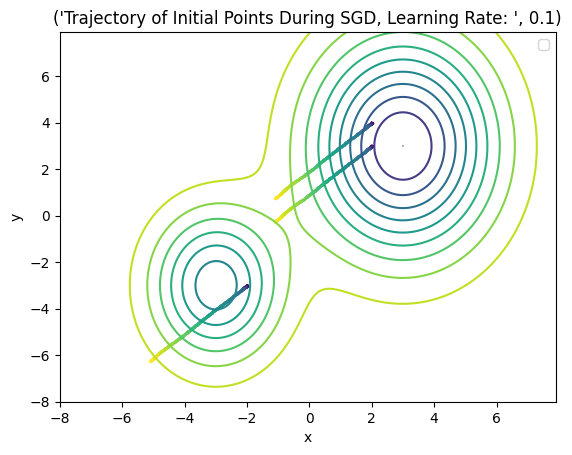

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


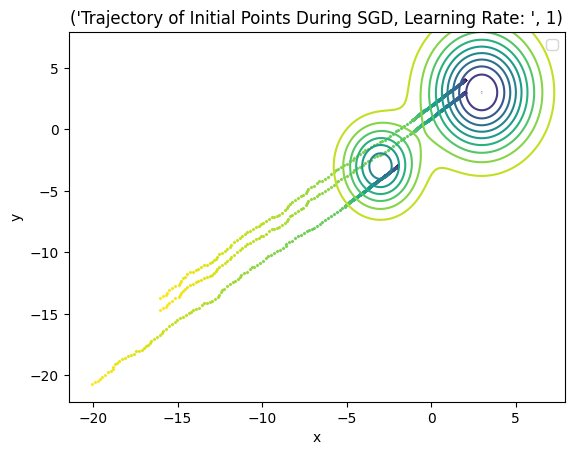

In [1]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

# Define the function F(x, y)
def F(x, y):
    return 1.8 - np.exp(-0.1 * (2.5 * (x + 3)**2 + (y + 3)**2)) - 1.5 * np.exp(-0.05 * (2.5 * (x - 3)**2 + (y - 3)**2))

x = np.arange(-8, 8, 0.1)
y = np.arange(-8, 8, 0.1)
X, Y = np.meshgrid(x, y)
# Flatten the grid for interpolation
points = np.column_stack((X.flatten(), Y.flatten()))
values = F(X, Y)
# Create RegularGridInterpolator
interpolator = RegularGridInterpolator((x, y), values, method='linear', bounds_error=False, fill_value=None)

# Stochastic Gradient Descent
learning_rate = [0.001, 0.01, 0.1, 1]
num_iterations = 100

# Initial guess
gradient_points = np.array([-2., -3.])

# Lists to store the trajectory for visualization
grad_x = [gradient_points[0]]
grad_y = [gradient_points[1]]
trajectory_z = [F(*gradient_points)]
initial_points = np.array([[-2, -3], [2, 3], [2, 4]], dtype=float)  # Ensure initial_points is of dtype float

# Lists to store the trajectory of initial points for visualization
initial_x_traj = [initial_points[:, 0].copy()]
initial_y_traj = [initial_points[:, 1].copy()]
for l_rate in learning_rate:
    for i in range(num_iterations):
        # Generate random indices for the batch
        indices = np.random.choice(len(points), size=10, replace=False)
        batch_points = points[indices]
        
        # Calculate gradient using RegularGridInterpolator
        gradient = interpolator(np.array([batch_points[:, 0], batch_points[:, 1]]).T)
        gradient_points -= l_rate * gradient.mean(axis=0)
        
        # Store the trajectory for visualization
        grad_x.append(gradient_points[0])
        grad_y.append(gradient_points[1])
        trajectory_z.append(F(*gradient_points))
        
        # Update the initial points trajectory
        initial_points[:, 0] -= l_rate * gradient[0]  # Update each point separately
        initial_points[:, 1] -= l_rate * gradient[1]
        
        initial_x_traj.append(initial_points[:, 0].copy())
        initial_y_traj.append(initial_points[:, 1].copy())

    # Plot the contour of the function
    plt.contour(X, Y, F(X, Y), levels=10, cmap='viridis')

    # Plot the trajectory of initial points
    x= 0 
    for i in range(x,num_iterations):
        plt.scatter(initial_x_traj[i], initial_y_traj[i], marker='x', color=plt.cm.viridis(i / num_iterations), s=2)
    x+=100
    num_iterations += 100


    plt.title(('Trajectory of Initial Points During SGD, Learning Rate: ', l_rate))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

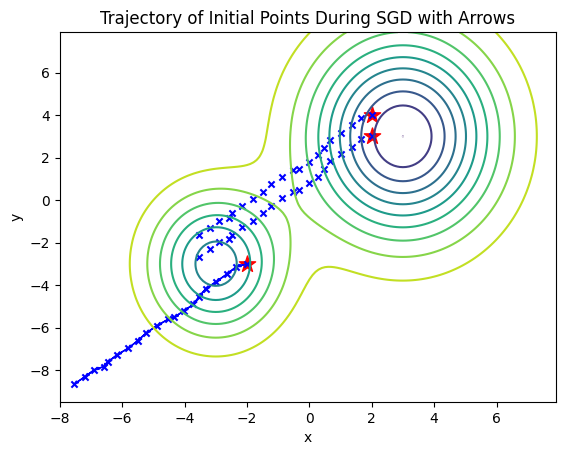

In [2]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

# Define the function F(x, y)
def F(x, y):
    return 1.8 - np.exp(-0.1 * (2.5 * (x + 3)**2 + (y + 3)**2)) - 1.5 * np.exp(-0.05 * (2.5 * (x - 3)**2 + (y - 3)**2))

x = np.arange(-8, 8, 0.1)
y = np.arange(-8, 8, 0.1)
X, Y = np.meshgrid(x, y)
# Flatten the grid for interpolation
points = np.column_stack((X.flatten(), Y.flatten()))
values = F(X, Y)
# Create RegularGridInterpolator
interpolator = RegularGridInterpolator((x, y), values, method='linear', bounds_error=False, fill_value=None)

# Stochastic Gradient Descent
learning_rate = 0.2
num_iterations = 20

# Initial guess
gradient_points = np.array([-2., -3.])

# Lists to store the trajectory for visualization
grad_x = [gradient_points[0]]
grad_y = [gradient_points[1]]
trajectory_z = [F(*gradient_points)]
initial_points = np.array([[-2, -3], [2, 3], [2, 4]], dtype=float)  # Ensure initial_points is of dtype float

# Lists to store the trajectory of initial points for visualization
initial_x_traj = [initial_points[:, 0].copy()]
initial_y_traj = [initial_points[:, 1].copy()]

# Plot the contour of the function
plt.contour(X, Y, F(X, Y), levels=10, cmap='viridis')

# Plot the initial points with red stars
plt.scatter(initial_x_traj[0], initial_y_traj[0], marker='*', color='red', s=150)

for i in range(num_iterations):
    # Generate random indices for the batch
    indices = np.random.choice(len(points), size=10, replace=False)
    batch_points = points[indices]
    
    # Calculate gradient using RegularGridInterpolator
    gradient = interpolator(np.array([batch_points[:, 0], batch_points[:, 1]]).T)
    gradient_points -= learning_rate * gradient.mean(axis=0)
    
    # Store the trajectory for visualization
    grad_x.append(gradient_points[0])
    grad_y.append(gradient_points[1])
    trajectory_z.append(F(*gradient_points))
    
    # Update the initial points trajectory
    initial_points[:, 0] -= learning_rate * gradient[0]  # Update each point separately
    initial_points[:, 1] -= learning_rate * gradient[1]
    
    initial_x_traj.append(initial_points[:, 0].copy())
    initial_y_traj.append(initial_points[:, 1].copy())

# Plot the trajectory of initial points with blue "x" markers
for i in range(num_iterations):
    plt.scatter(initial_x_traj[i], initial_y_traj[i], marker='x', color='blue', s=20)
    
# Add arrows to connect consecutive points in the trajectory
for i in range(num_iterations - 1):
    plt.arrow(initial_x_traj[i][0], initial_y_traj[i][0],
              initial_x_traj[i + 1][0] - initial_x_traj[i][0],
              initial_y_traj[i + 1][0] - initial_y_traj[i][0],
              color='blue', width=0.01, head_width=0.1, length_includes_head=True)

plt.title('Trajectory of Initial Points During SGD with Arrows')
plt.xlabel('x')
plt.ylabel('y')
plt.show()